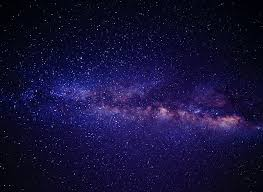

## **Classifying Spiral Galaxies Using Convolutional Neural Networks**

From the historic moon landing to SpaceX's modern pioneering of reusable rockets, understanding the way the universe works is a crucial part of humankind's adventure in the next frontier. The analysis of space data has yielded numerous tangible advancements in aerospace engineering and beyond.

Categorizing galaxies into different types based on their morphological features is a crucial way scientists can gain insights into the processes governing galaxy formation and evolution. This, in turn, facilitates a deeper comprehension of our own galaxy's properties, including its age and the preparation of astronomical phenomena.

In this simple model built with convolutional neural networks on TensorFlow, we will attempt to classify 4 groups of spiral galaxies:

1.   Smooth Round
2.   Smooth Cigar
3.   Edge on Disk
4.   Unbarred Spiral

In [ ]:
%pip install git+https://github.com/mwalmsley/galaxy_mnist.git

In [29]:
from galaxy_mnist import GalaxyMNIST
import numpy as np
import matplotlib.pyplot as plt,
from matplotlib.gridspec import GridSpec
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.metrics import roc_curve, auc, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import h5py
from google.colab import files
from IPython.display import HTML, display
import ipywidgets as widgets
from PIL import Image
import io

In [5]:
# Check if GPU is available
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [43]:
def plot_image(image_tensor, ax=None):
    if ax is None:
        ax = plt.gca()
    # convert to numpy array
    image = np.array(image_tensor)
    # move the RGB axis to the end
    image = np.moveaxis(image, 0, -1)
    # plot on the given axis object
    ax.imshow(image)

In [66]:
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


In [6]:
dataset = GalaxyMNIST(
    root='/galaxy_mnist_download',
    download=True,
    train=True
)

testset = GalaxyMNIST(
    root='/galaxy_mnist_download',
    download=True,
    train=False
)

100%|██████████| 68681710/68681710 [00:11<00:00, 5757682.76it/s]


Extracting /galaxy_mnist_download/GalaxyMNIST/raw/train_dataset.hdf5.gz to /galaxy_mnist_download/GalaxyMNIST/raw


100%|██████████| 17251325/17251325 [00:01<00:00, 10475475.09it/s]


Extracting /galaxy_mnist_download/GalaxyMNIST/raw/test_dataset.hdf5.gz to /galaxy_mnist_download/GalaxyMNIST/raw


In [52]:
# Load the HDF5 files
with h5py.File('/galaxy_mnist_download/GalaxyMNIST/raw/train_dataset.hdf5', 'r') as hdf_file:
    train_data = hdf_file['images'][:]
    train_labels = hdf_file['labels'][:]
    dataset_names = list(hdf_file.keys())

with h5py.File('/galaxy_mnist_download/GalaxyMNIST/raw/test_dataset.hdf5', 'r') as hdf_file:
    test_data = hdf_file['images'][:]
    test_labels = hdf_file['labels'][:]

print(f"Train data shape: {train_data.shape}")

Train data shape: (8000, 64, 64, 3)


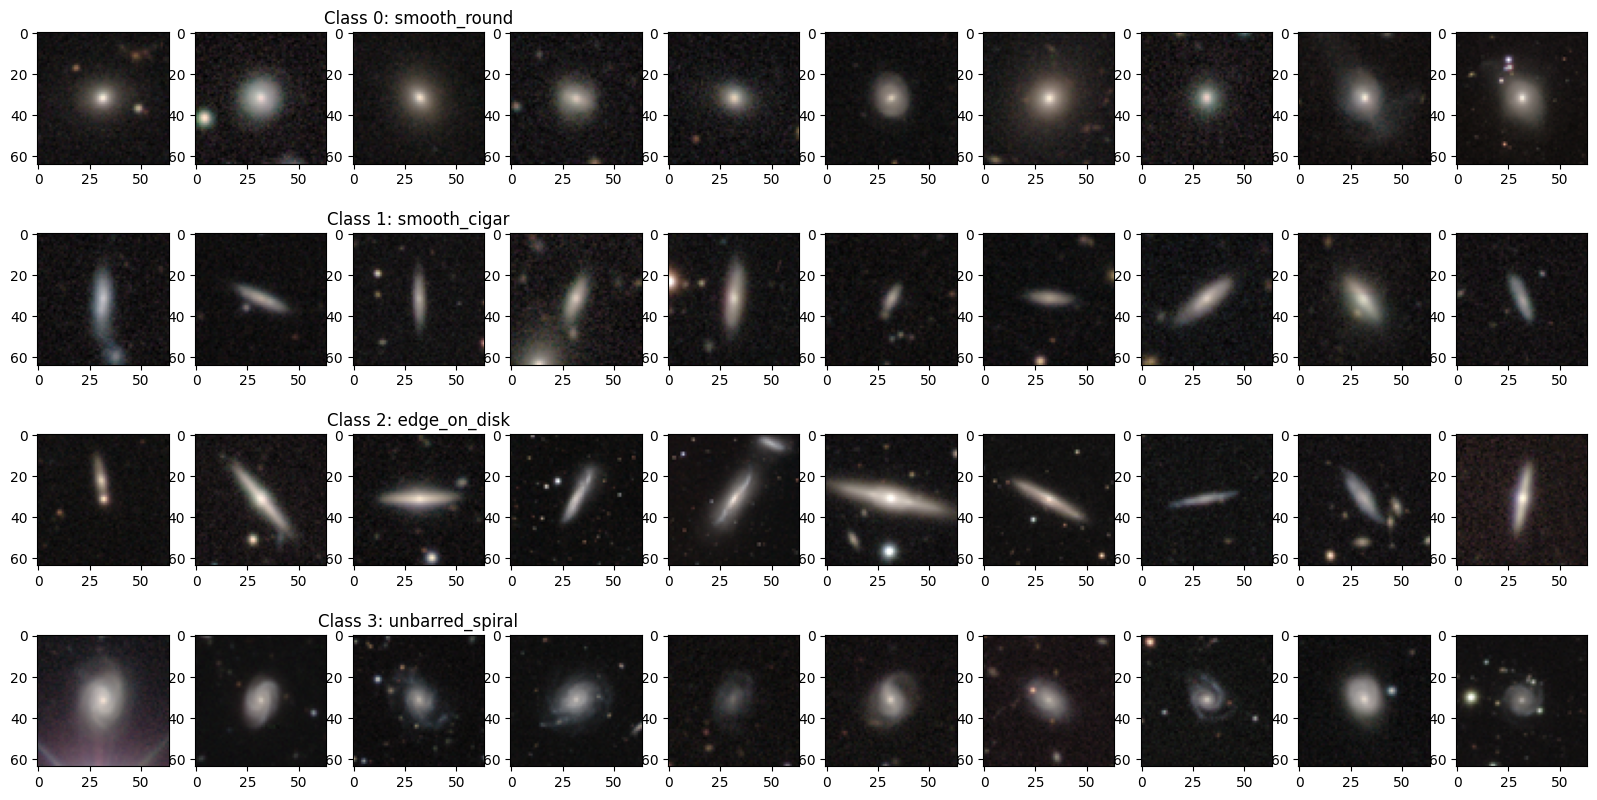

In [51]:
fig = plt.figure(figsize=(20, 10))
# use gridsped for creating subplots
gs = GridSpec(4, 10)

for i in range(4):
    # get images for the class
    idx = dataset.targets == i
    images_idx = dataset.data[idx]
    for j in range(10):
        # plot the first 5 images for each class
        ax = fig.add_subplot(gs[i, j])
        plot_image(images_idx[j], ax=ax)
        # place a title for each row
        if j == 2:
            ax.set_title(f'Class {i}: {GalaxyMNIST.classes[i]}')

In [53]:
# Normalize the pixel values
train_data = train_data / 255.0
test_data = test_data / 255.0

# Normalize the grayscale from 0-255 to 0-1
x_train = np.array(train_data[:,:]/255.0)
x_test  = np.array(test_data[:,:]/255.0)
y_train = np.array(train_labels)
y_test  = np.array(test_labels)

We create 3 convolutional layers with an increasing number of neurons. This should be enough to effectively handle and iterate through 8,000 images of size 64x64.

In [64]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 output classes: smooth_round, smooth_cigar, edge_on_disk, unbarred_spiral
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
model.fit(x=train_data, y=train_labels, epochs=15, validation_split=0.3)

Epoch 1/15
175/175 [==============================] - 3s 10ms/step - loss: 1.2213 - accuracy: 0.4721 - val_loss: 1.0356 - val_accuracy: 0.5692
Epoch 2/15
175/175 [==============================] - 1s 8ms/step - loss: 0.8524 - accuracy: 0.6591 - val_loss: 0.7613 - val_accuracy: 0.6942
Epoch 3/15
175/175 [==============================] - 1s 7ms/step - loss: 0.7022 - accuracy: 0.7223 - val_loss: 0.6993 - val_accuracy: 0.6975
Epoch 4/15
175/175 [==============================] - 1s 8ms/step - loss: 0.6264 - accuracy: 0.7468 - val_loss: 0.6419 - val_accuracy: 0.7279
Epoch 5/15
175/175 [==============================] - 1s 7ms/step - loss: 0.5855 - accuracy: 0.7623 - val_loss: 0.5837 - val_accuracy: 0.7592
Epoch 6/15
175/175 [==============================] - 1s 7ms/step - loss: 0.5439 - accuracy: 0.7741 - val_loss: 0.5961 - val_accuracy: 0.7483
Epoch 7/15
175/175 [==============================] - 1s 8ms/step - loss: 0.5197 - accuracy: 0.7805 - val_loss: 0.5612 - val_accuracy: 0.7667
Epoch

In [68]:
predictions = model.predict(x_test)

63/63 [==============================] - 1s 6ms/step
